In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
import emcee
from models_EF import *
sb.set_style('white')
%config InlineBackend.figure_format = 'retina'

In [2]:
Ener,Flux,err_up,err_dn = np.loadtxt('data/O_cen_data_flux2.txt',usecols=(0,1,4,5),unpack=True)

In [3]:
error = err_up**2 + err_dn**2

In [4]:
print Flux

[1.94110634e-11 9.28507402e-12 6.04263645e-12 5.32393151e-12
 4.43186988e-12 1.53962077e-12 8.50477653e-13 0.00000000e+00
 0.00000000e+00]


In [5]:
Ener,Flux,error = Ener[:7],Flux[:7],error[:7]

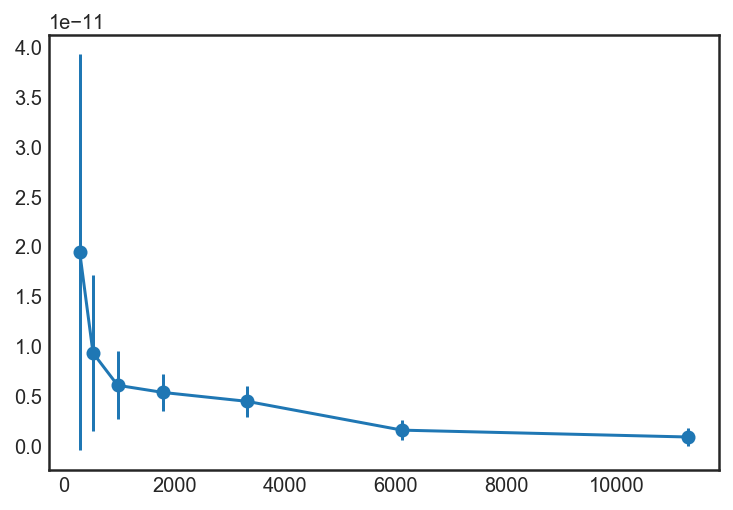

In [6]:
plt.errorbar(Ener,Flux,yerr=np.sqrt(error),fmt='-o');

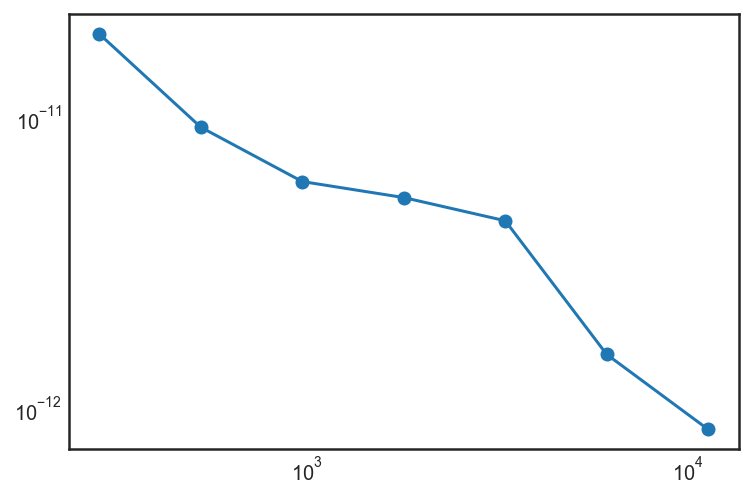

In [7]:
plt.loglog(Ener,Flux,'o-');

In [8]:
print Flux

[1.94110634e-11 9.28507402e-12 6.04263645e-12 5.32393151e-12
 4.43186988e-12 1.53962077e-12 8.50477653e-13]


In [9]:
from scipy import optimize as op

In [10]:
fun = lambda *args: -flux_lnhood(*args)

In [11]:
mid = [1.,3.,-10.,-10.,2.5]
bnds = ((-1.,3.), (2.,4.), (-20.,0.),(-20.,0.),(0.,5.))

In [12]:
result = op.minimize(fun, mid, args=(Flux,error,Ener,'p+b',None),method = 'TNC',bounds=bnds)

In [13]:
print result.x

[  0.98949986   3.19317916  -8.21201648 -10.09558585   2.48494999]


In [14]:
p_list = [-1.,3., 2.,4.,-20.,0.,-20.,0.,0.,5.]

In [15]:
nwalkers = 400
ndim = (len(p_list)/2)

In [16]:
z = np.zeros((ndim,nwalkers))

In [17]:
h = 1e-2

pos_i=[]


for i in range(ndim):
    z[i,:] =result.x[i] + h*np.random.randn(nwalkers)

for i in range(nwalkers):
    pos_i.append(np.array([z[0,i],z[1,i],z[2,i],z[3,i],z[4,i]]))

In [18]:
b_steps, steps = 1000, 2000

In [19]:
sampler = emcee.EnsembleSampler(nwalkers, ndim,flux_lnpost, 
                                args=(Flux,error,Ener,p_list,'p+b',None),
                                threads = 2)

In [20]:
pos,prob,state=sampler.run_mcmc(pos_i, b_steps)

In [21]:
print sampler.acceptance_fraction.mean()

0.39761750000000007


In [22]:
sampler.reset()

In [23]:
_,_,_=sampler.run_mcmc(pos, steps, rstate0=state)

In [24]:
print sampler.acceptance_fraction.mean()

0.39935999999999994


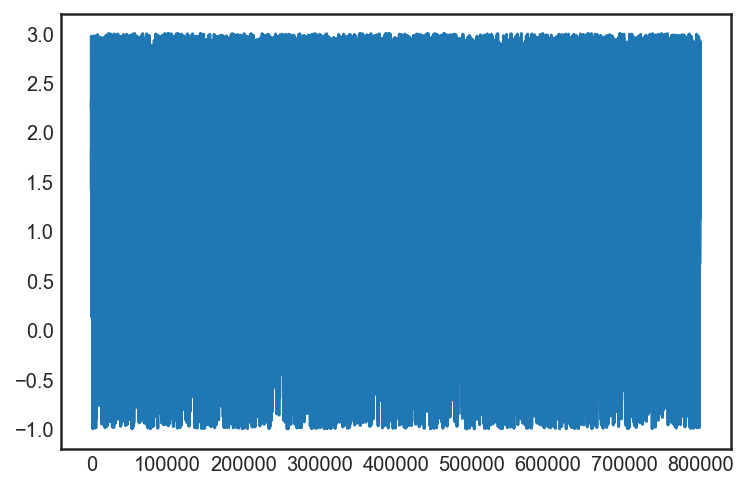

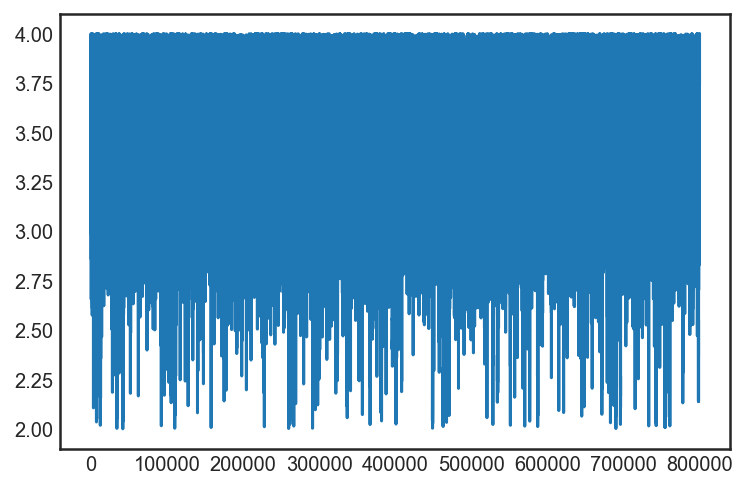

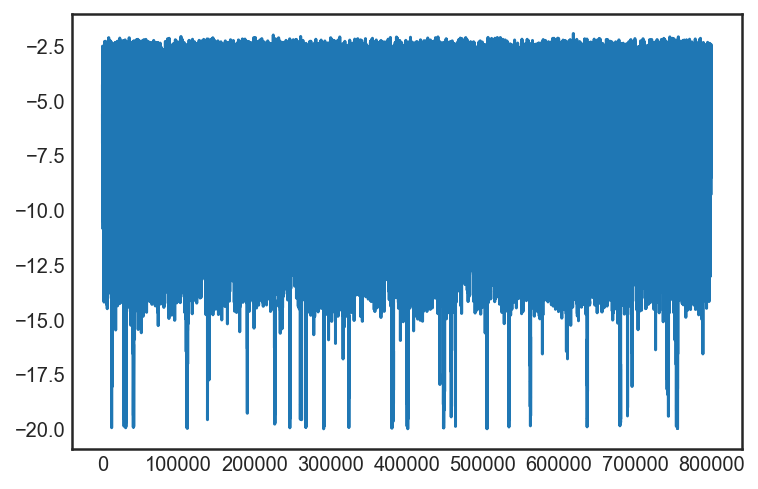

In [25]:
plt.figure()
plt.plot(sampler.flatchain[:,0]);
plt.figure()
plt.plot(sampler.flatchain[:,1]);
plt.figure()
plt.plot(sampler.flatchain[:,2]);

In [26]:
import corner as corner 

In [27]:
labels = [r'$\Gamma$',r'$log10(E_{cut})$','log10(N0)',r'$log10(N_N)$',r'$\alpha$']

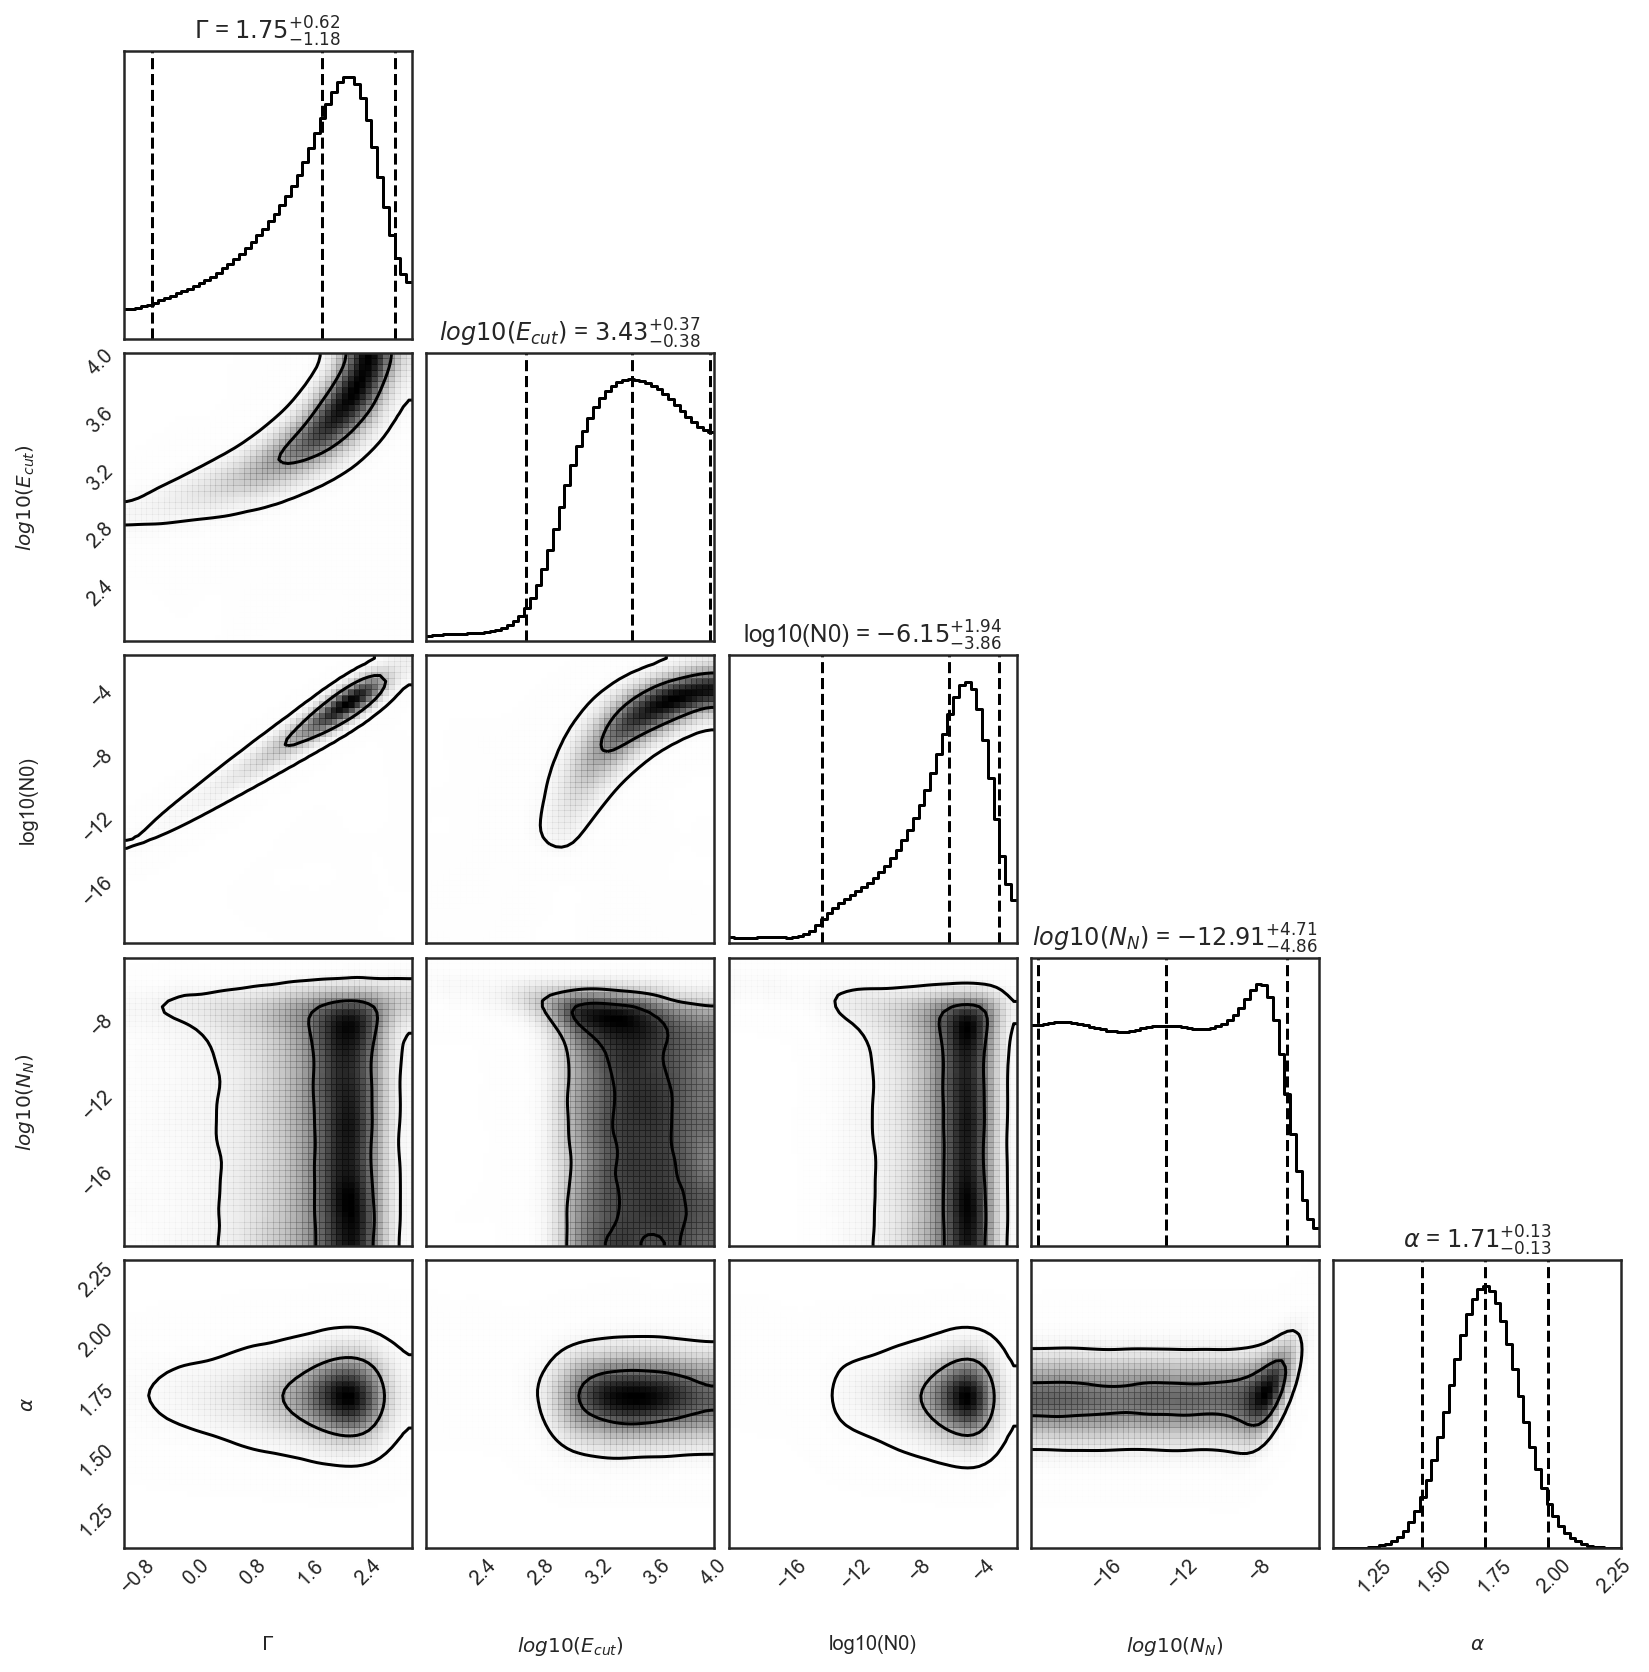

In [28]:
fig = corner.corner(sampler.flatchain,bins=50,labels=labels,plot_datapoints=False,smooth=2., 
                    smooth1d=2.,levels=(1.-np.exp(-0.5),1.-np.exp(-2.)),quantiles=[.025,0.5,0.975],show_titles=True);

fig.savefig('flux_gauss_isotropic.pdf')

np.savetxt('data/flux_chains_gauss_iso.dat',sampler.flatchain)

In [34]:
flux_result = E2dNdE_flux([1.75,3.43,-6.15],Ener) * Ener**2

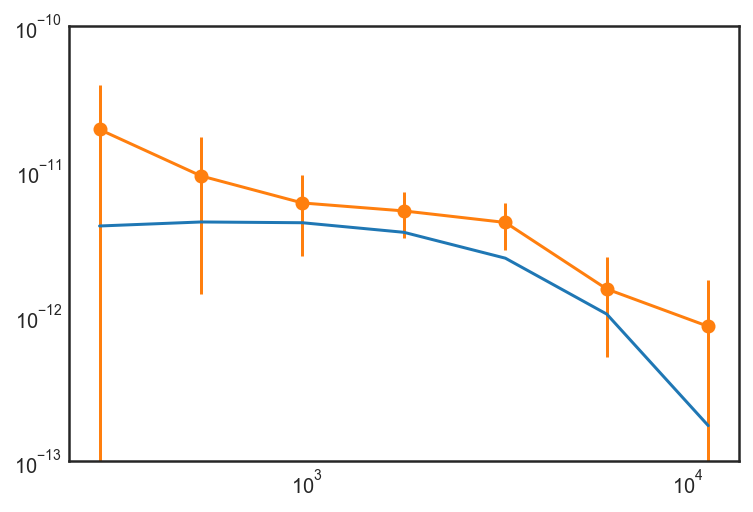

In [35]:
plt.loglog(Ener,flux_result*1.602e-6);
plt.errorbar(Ener,Flux,yerr=np.sqrt(error),fmt='o-');
plt.xscale('log');
plt.yscale('log');
plt.ylim(1e-13,1e-10);

In [31]:
#background_flux2 = np.loadtxt('data/O_cen_data_Bck_flux2.txt',usecols=(1),unpack=True)

In [32]:
plt.loglog(Ener,background_flux2);

NameError: name 'background_flux2' is not defined